## INT420-491 : Distance and Similarity + KNN 
45-minutes study

In [1]:
import pandas as pd 
from myFunc import summary_table
import numpy as np
from sklearn.impute import KNNImputer
#pd.set_option('mode.chained_assignment','warn')
#pd.set_option('mode.chained_assignment',None)

### Read Data

In [ ]:
#Stroke Prediction Dataset
df_org = pd.read_csv("data/StrokeData/healthcare-dataset-stroke-data.csv")
df = df_org.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Handle Missing Values 

In [12]:
print(df.shape)
print('Before: ') 
print(summary_table(df))

#df['bmi'] = fillna_global_mean(df,'bmi')
# df = fillna_group_mean(df,'bmi','stroke')
df = df.dropna()

print('After: ') 
print(summary_table(df))
print(df.shape)

(5110, 12)
Before: 
     is Na     %
bmi    201  3.93
None
After: 
Empty DataFrame
Columns: [is Na, %]
Index: []
None
(4909, 12)


### Select Columns with continuous values

In [8]:
print(df.loc[0])
print(df.info())

id                              9046
gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   ob

In [21]:
data = df[['age','hypertension','avg_glucose_level','bmi']]
label = df[['stroke']]
data

,age,hypertension,avg_glucose_level,bmi
0,67.0,0,228.69,36.6
2,80.0,0,105.92,32.5
3,49.0,0,171.23,34.4
4,79.0,1,174.12,24.0
5,81.0,0,186.21,29.0
...,...,...,...,...
5104,13.0,0,103.08,18.6
5106,81.0,0,125.20,40.0
5107,35.0,0,82.99,30.6
5108,51.0,0,166.29,25.6


### Distance

In [14]:
import numpy as np 

In [22]:
v1 = data.iloc[0]
v2 = data.iloc[1]

In [23]:
v1

age                   67.00
hypertension           0.00
avg_glucose_level    228.69
bmi                   36.60
Name: 0, dtype: float64

In [24]:
v2

age                   80.00
hypertension           0.00
avg_glucose_level    105.92
bmi                   32.50
Name: 2, dtype: float64

In [ ]:
v1-v2

In [ ]:
(v1-v2)*(v1-v2)

In [30]:
np.power(v1-v2,2)

age                    169.0000
hypertension             0.0000
avg_glucose_level    15072.4729
bmi                     16.8100
dtype: float64

In [29]:
np.sum(np.power(v1-v2,2))

15258.282899999998

In [28]:
np.sqrt(np.sum(np.power(v1-v2,2)))

123.52442228158769

In [26]:
#Euclidean Distance
dist = np.sqrt(np.sum(np.power(v1-v2,2)))
dist

123.52442228158769

In [27]:
#Manhatan Distance
dist_man = np.sum(np.abs(v1-v2))
dist_man

139.86999999999998

### Similarity

In [ ]:
v1

In [ ]:
v2

In [ ]:
v1*v1

In [ ]:
np.sum(v1*v1)

In [ ]:
np.sqrt(np.sum(v1*v1)) #norm of v1

In [ ]:
np.sqrt(np.sum(v2*v2)) #norm of v2

In [ ]:
v1*v2

In [ ]:
np.sum(v1*v2)  # dot product of v1 and v2

In [ ]:
np.sum(v1*v2) / (np.sqrt(np.sum(v1*v1)) * np.sqrt(np.sum(v2*v2)))

In [ ]:
similarity = np.sum(v1*v2) / (np.sqrt(np.sum(v1*v1)) * np.sqrt(np.sum(v2*v2)))

In [ ]:
label[0:2]

In [ ]:
data[0:2]

### Pairwise Distance Matrix

In [ ]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
pdist = euclidean_distances(data)

In [ ]:
data.shape

In [ ]:
pdist.shape

In [ ]:
pdist[0:3,0:3]

### Pairwise Similarity Matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
psim = cosine_similarity(data)

In [ ]:
psim[0:3,0:3]

### Find Nearest Point

### Using Distance

In [ ]:
pdist = pdist+np.max(pdist)*np.eye(4909)

In [ ]:
pdist

In [ ]:
np.argmin(pdist[1,:])

In [ ]:
data.iloc[885]

In [ ]:
data.iloc[1]

In [ ]:
label.iloc[1]

In [ ]:
label.iloc[885]

#### Using Similarity

In [ ]:
psim = psim-np.eye(4909)

In [ ]:
psim[0:4,0:4]

In [ ]:
np.argmax(psim[1,:])

In [ ]:
data.iloc[3317]

In [ ]:
data.iloc[1]

In [ ]:
label.iloc[3317]

In [ ]:
label.iloc[1]

### KNN 


In [ ]:
k=3
test_id = 1
nn = pdist[test_id,:].argsort()[:k]

In [ ]:
label_neighbor = label.iloc[nn]['stroke']

In [ ]:
np.sum(label_neighbor==0)

In [ ]:
np.sum(label_neighbor==1)

In [ ]:
if (np.sum(label_neighbor==0) > np.sum(label_neighbor==1)) :
    predict = 0
else:
    predict = 1

In [ ]:
print("Predict:", predict)
print("ACtual:", label.iloc[test_id]['stroke'])

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
df.head()

### Visualization 
- https://plotly.com/python/plotly-express/#gallery

In [53]:
import plotly.express as px
df_plot = df.copy()
df_plot["stroke"] = df_plot["stroke"].astype("category")

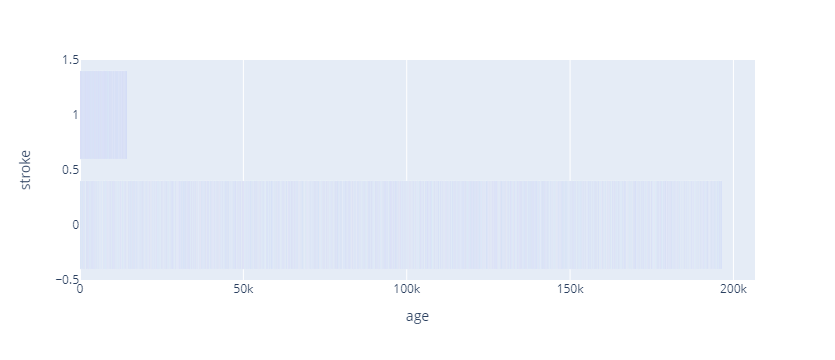

In [54]:
#bar
fig = px.bar(df_plot,x='age',y="stroke")
fig.show()

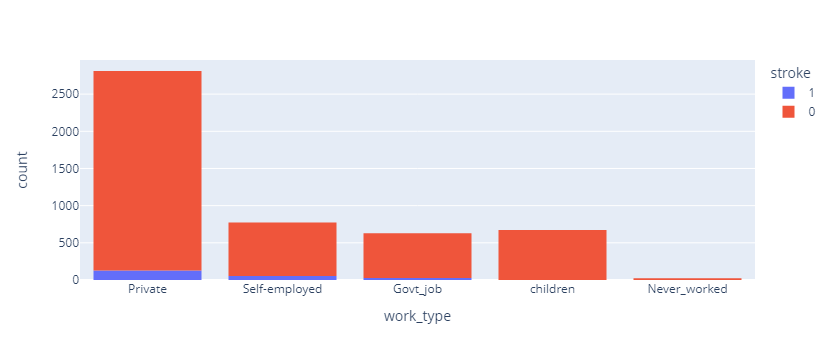

In [55]:
#histogram
fig = px.histogram(df_plot,x="work_type",color='stroke')
fig.show()

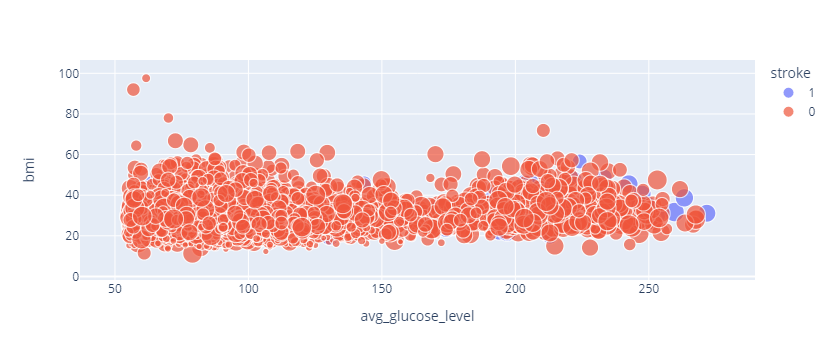

In [60]:
#scatter 
fig = px.scatter(df_plot[df_plot['age']>5], x="avg_glucose_level", 
                 y='bmi', color="stroke", size="age")  

fig.show()

### Dash with Interactive 
- https://pypi.org/project/dash-tools/ 
- https://dash.plotly.com/
- https://dash-tools.readthedocs.io/en/latest/index.html
- https://pypi.org/project/dash-bootstrap-templates/
